In [3092]:
# importing the necessary libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Cleaning

In [3093]:
# Reading the data
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3094]:
#Checking the shape of the dataframe
df.shape

(9240, 37)

In [3095]:
# Let's drop the irrelavent columns
# Prospect ID and Lead Number 
df1 = df.drop(columns = ["Prospect ID", "Lead Number"])
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3096]:
# let's check the shape of the dataframe after dropping the columns
df1.shape

(9240, 35)

In [3097]:
# let's check for the missing values
df1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [3098]:
# Let's check for the percentage of missing values in the each column

missing_value_array = np.array(df1.isnull().sum())
columns = np.array(df1.columns)
for i in range(df1.shape[1]):
    print(columns[i],":", end = "\t")
    print(round((missing_value_array[i]/df1.shape[0])*100,2),"%")


Lead Origin :	0.0 %
Lead Source :	0.39 %
Do Not Email :	0.0 %
Do Not Call :	0.0 %
Converted :	0.0 %
TotalVisits :	1.48 %
Total Time Spent on Website :	0.0 %
Page Views Per Visit :	1.48 %
Last Activity :	1.11 %
Country :	26.63 %
Specialization :	15.56 %
How did you hear about X Education :	23.89 %
What is your current occupation :	29.11 %
What matters most to you in choosing a course :	29.32 %
Search :	0.0 %
Magazine :	0.0 %
Newspaper Article :	0.0 %
X Education Forums :	0.0 %
Newspaper :	0.0 %
Digital Advertisement :	0.0 %
Through Recommendations :	0.0 %
Receive More Updates About Our Courses :	0.0 %
Tags :	36.29 %
Lead Quality :	51.59 %
Update me on Supply Chain Content :	0.0 %
Get updates on DM Content :	0.0 %
Lead Profile :	29.32 %
City :	15.37 %
Asymmetrique Activity Index :	45.65 %
Asymmetrique Profile Index :	45.65 %
Asymmetrique Activity Score :	45.65 %
Asymmetrique Profile Score :	45.65 %
I agree to pay the amount through cheque :	0.0 %
A free copy of Mastering The Interview :	

In [3099]:
# Checking different values in the Lead Score column
df1["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [3100]:
# The percentage of missing values in the Lead Source is 0.39%
# Hence it is ideal to impute the values
# It is a categorical variable , mode would be best one 

mode_Lead_Source = df1["Lead Source"].mode()[0]
mode_Lead_Source

df1["Lead Source"] = df1["Lead Source"].fillna(mode_Lead_Source)

# There are duplicate values, correcting them
df1["Lead Source"] = df1["Lead Source"].apply(lambda X: "Google" if X == "google" else X)
# df1.isnull().sum()

In [3101]:
# Checking for the values in the TotalVisits Columns
df1["TotalVisits"].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [3102]:
# The percentage of missing values in TotalVisits :	1.48 %
# It can be imputed 
# It is a continuos variable so, opting for meadian
median_TotalVisits = df1["TotalVisits"].median()
median_TotalVisits

df1["TotalVisits"] = df1["TotalVisits"].fillna(median_TotalVisits)
# df1.isnull().sum()


In [3103]:
# Checking the type of values in the Page Views Per Visit column
df1["Page Views Per Visit"].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [3104]:
# The percentage of the missing values in Page Views Per Visit :	1.48 %
# Imputing the missing values with mdeian
median_Page_Views_Per_Visit = df1["Page Views Per Visit"].median()
median_Page_Views_Per_Visit

df1["Page Views Per Visit"] = df1["Page Views Per Visit"].fillna(median_Page_Views_Per_Visit)
# df1.isnull().sum()

In [3105]:
# Checking for the values in Last Activity 
df1["Last Activity"].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [3106]:
# The percentage of the missing values in Last Activity :	1.11 %
# Imputing the missing values with the "Unkown"

df1["Last Activity"] = df1["Last Activity"].fillna("Unknown")

# df1.isnull().sum()

In [3107]:
# Checking the country column
df1["Country"].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [3108]:
# The percentage of missing values in Country :	26.63 %
# Replacing the missing values to "unkown"
# Because we might need that to get insights
df1["Country"] = df1["Country"].fillna("Unknown")

# There are duplicate values, correcting them
df1["Country"] = df1["Country"].apply(lambda X: "Unknown" if X == "unknown" else X)

# df1.isnull().sum()


In [3109]:
# Checking Specialization column
df1["Specialization"].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [3110]:
# The percentage of missing values in Specialization :	15.56 %

# Replacing the select specialization with "unknown"
df1["Specialization"]=df1["Specialization"].replace("Select","Not Specified")

# Imputing the missing values with "Unknown"
df1["Specialization"]=df1["Specialization"].fillna("Not Specified")

#df.isnull().sum()
df1["Specialization"].value_counts()

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [3111]:
# Checking the "How did you hear about X Education" column
df1["How did you hear about X Education"].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [3112]:
# Percentage of Select in "How did you hear about X Education" column
round((5043/9240)*100,2)

54.58

In [3113]:
# The percentage of missing values in How did you hear about X Education :	23.89 %
# The percentage of select : 54.58%
# The total unknown values would account to total of 78.47%
# Thus it's better to drop the column 

df1 = df1.drop(columns=["How did you hear about X Education"],axis=1)
#df1.isnull().sum()

In [3114]:
# Checking the shape the dataframe
df1.shape

(9240, 34)

In [3115]:
# Checking "What is your current occupation" column
df1["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [3116]:
# The percentage of missing values in What is your current occupation :	29.11 %
# Assuming the mode i.e., unemployed instead of missing vlaues
What_is_your_current_occupation_mode = df1["What is your current occupation"].mode()
df1["What is your current occupation"] = df1["What is your current occupation"].fillna(What_is_your_current_occupation_mode[0])
# df1.isnull().sum()

In [3117]:
# Checking "What matters most to you in choosing a course" column 
df1["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [3118]:
# The percentage of missing values in "What matters most to you in choosing a course" is 29.32 % 
# Assuming the "Better Career Prospects" intsead of missing values 

Mode = df1["What matters most to you in choosing a course"].mode()[0]
df1["What matters most to you in choosing a course"] = df1["What matters most to you in choosing a course"].fillna(Mode)
#df1.isnull().sum()

In [3119]:
#Analyzing the tags 
df1["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [3120]:
# The percentage of missing values in Tags is 36.29 % 
# Dropping the column to avoid bias 

df1 = df1.drop(columns = ["Tags"])
df1.shape

(9240, 33)

In [3121]:
# Analyzing the Lead Quality
df1["Lead Quality"].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [3122]:
# The percentage of missing values in Lead Quality is 51.59 %
# Dropping the column to avoid bias 

df1 = df1.drop(columns = ["Lead Quality"])
df1.shape

(9240, 32)

In [3123]:
# Analyzing "Lead Profile" Column
df1["Lead Profile"].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [3124]:
# The percentage of Select in "Lead Profile"
(4146/9240)*100

44.87012987012987

In [3125]:
# The percentage of missing values in Lead Profile is 29.32 %
# The percenatge of select is 44.87%
# Totally there are 74.19 % missing values 
# Hence, It would be better dropping them 

df1 = df1.drop(columns = ["Lead Profile"])
df1.shape

(9240, 31)

In [3126]:
# Analyzing the city column
df1["City"].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [3127]:
# The percentage of missing values in City is 15.37 %
# Replace the missing values and selects with the mode

City_mode = df1["City"].mode()[0]
df1["City"] = df1["City"].apply(lambda x: City_mode if x == "Select" else x)

df1["City"] = df1["City"].fillna(City_mode)
# df1.isnull().sum()

In [3128]:
# Analyzing Asymmetrique Activity Index 
df1["Asymmetrique Activity Index"].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [3129]:
# Analyzing Asymmetrique Profile Index 
df1["Asymmetrique Activity Score"].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [3130]:
# Analyzing Asymmetrique Activity Score 
df1["Asymmetrique Profile Index"].value_counts()

Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

In [3131]:
# Analyzing Asymmetrique Profile Score 
df1["Asymmetrique Profile Score"].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

In [3132]:
# The percentage of missing values in Asymmetrique Activity Index is 45.65 %
# The percentage of missing values in Asymmetrique Profile Index is 45.65 %
# The percentage of missing values in Asymmetrique Activity Score is 45.65 %
# The percentage of missing values in Asymmetrique Profile Score is 45.65 %
# Dropping these columns to avoid bias 

df1 = df1.drop(columns = ["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"])
df1.shape

(9240, 27)

In [3133]:
df1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


EDA

Univariate Analysis

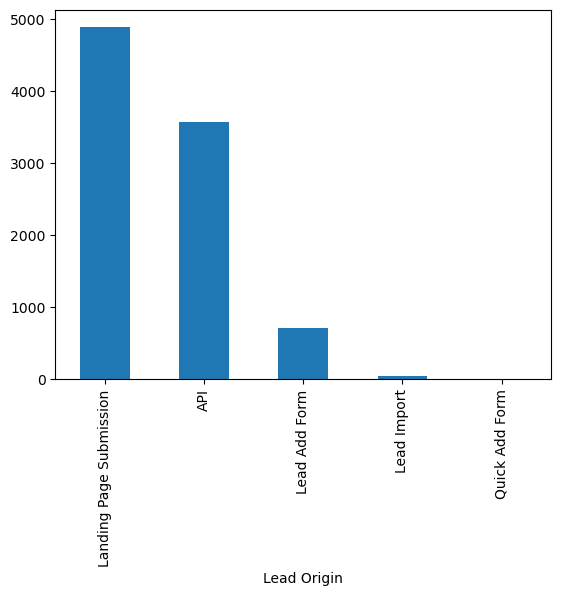

In [3134]:
# Analysing Lead origin
df1["Lead Origin"].value_counts().plot(kind = "bar")
plt.show()

# Leading Page Submission generates more number of leads

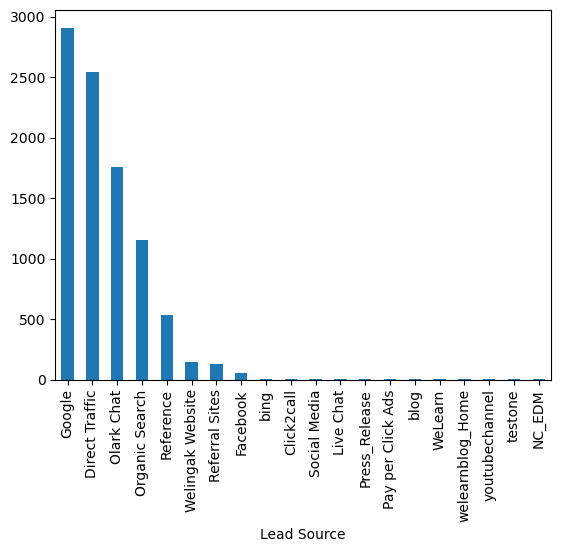

In [3135]:
# Analyzing Lead Source 
df1["Lead Source"].value_counts().plot(kind = "bar")
plt.show()

# Google is the one source which generates more number of leads

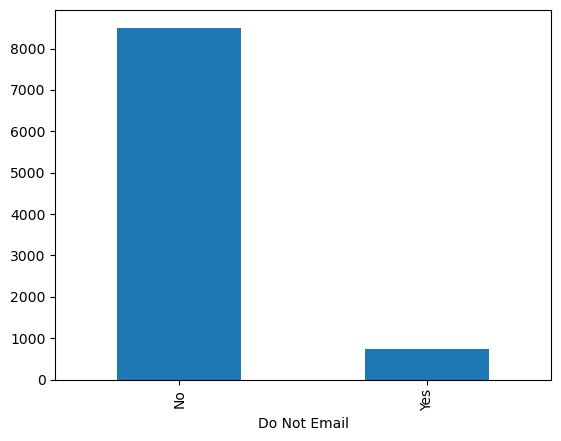

In [3136]:
# Analysing do not email 
df1["Do Not Email"].value_counts().plot(kind = "bar")
plt.show()

# People prefer mailing them about the course

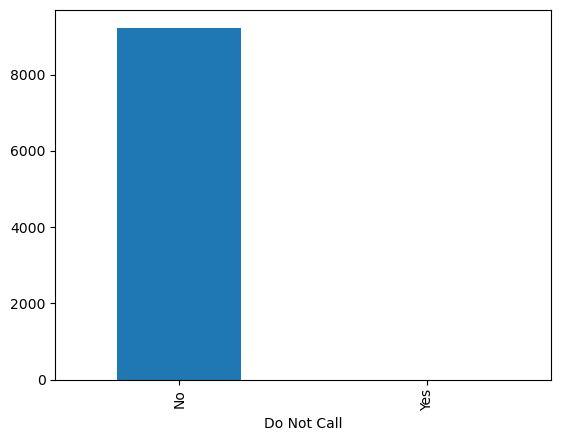

In [3137]:
# Analyzing Do Not Call 
df1["Do Not Call"].value_counts().plot(kind = "bar")
plt.show()

# Almost all prefer calling them about the course

In [3138]:
# People prefer calling as well as mailing them 

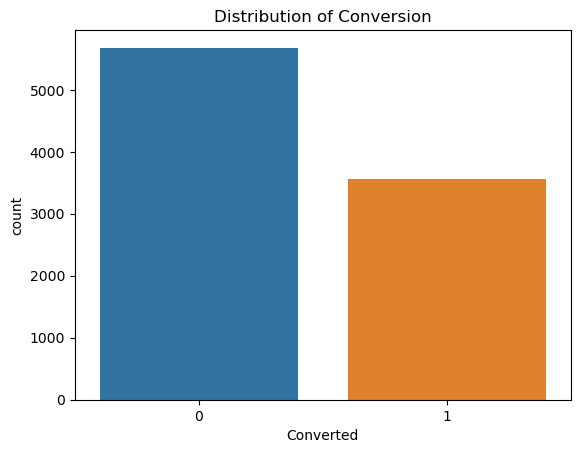

In [3139]:
# Understanding the distribution of conversion
sns.countplot(x='Converted', data=df1)
plt.title('Distribution of Conversion')
plt.show()

# The percentage of converted leads is 38.53%


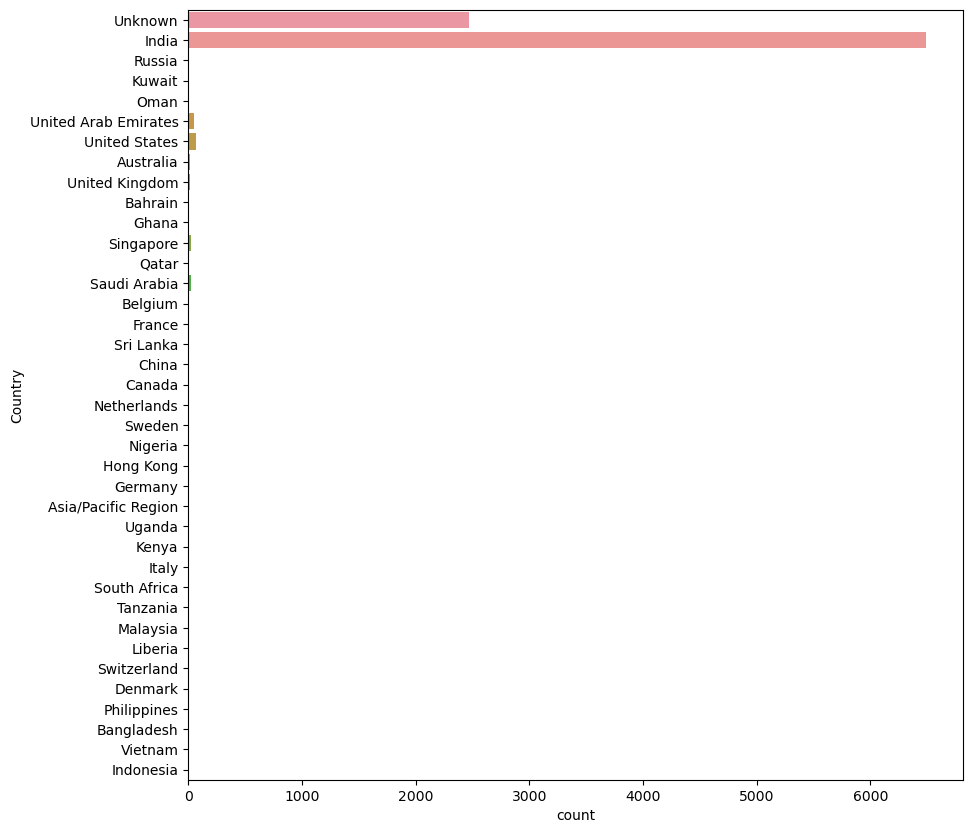

In [3140]:
# Analyzing Country
plt.figure(figsize=(10, 10))
sns.countplot(y='Country', data=df1)
plt.show()

# Most leads will be from India 

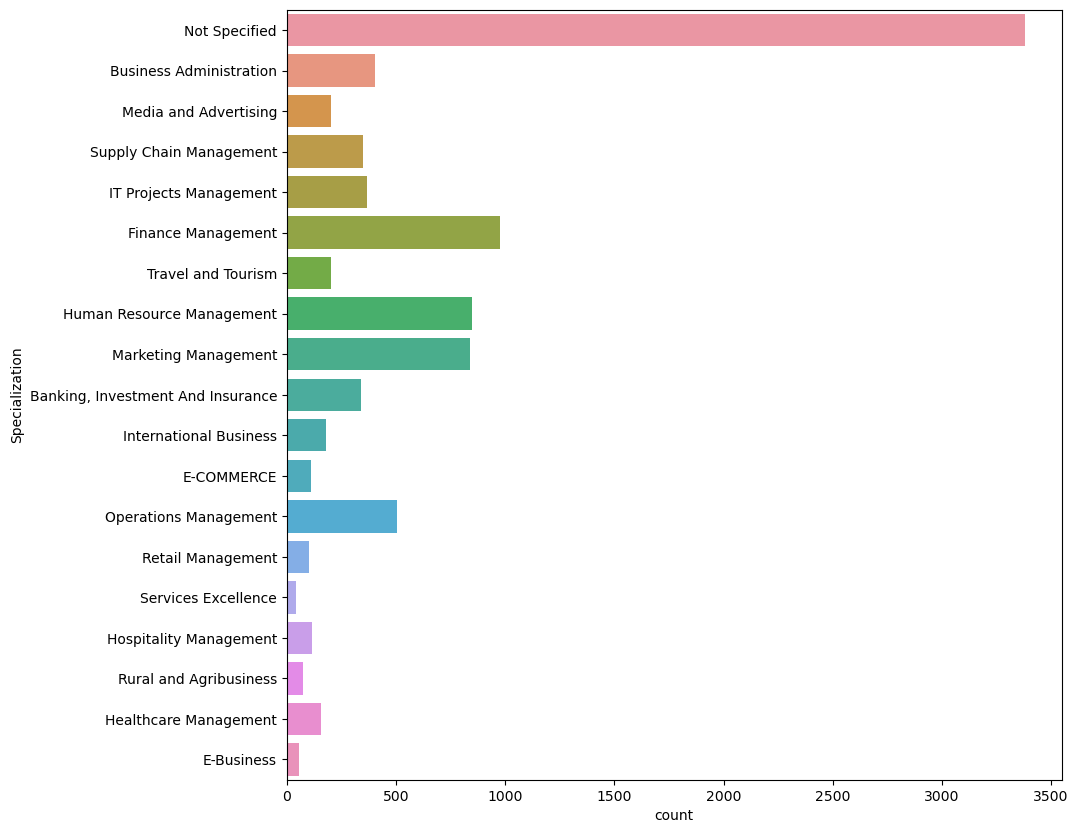

In [3141]:
# Analyzing the Specialization
plt.figure(figsize=(10, 10))
sns.countplot(data=df1, y='Specialization')
plt.show()

# Some of the fields from which more people are enrolled are "Finance management", "Human Resource Management"
# "Marketing Management"

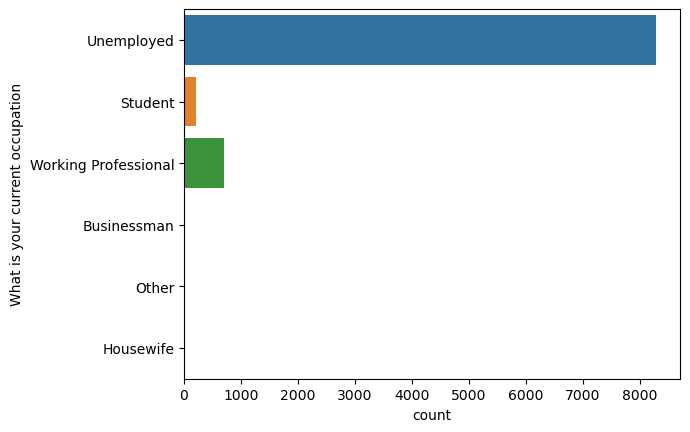

In [3142]:
# Analyzing the current occupation 
sns.countplot(data=df1, y='What is your current occupation')
plt.show()

# Most leads are unemployed  

In [3143]:
# Analyzing ad columns 

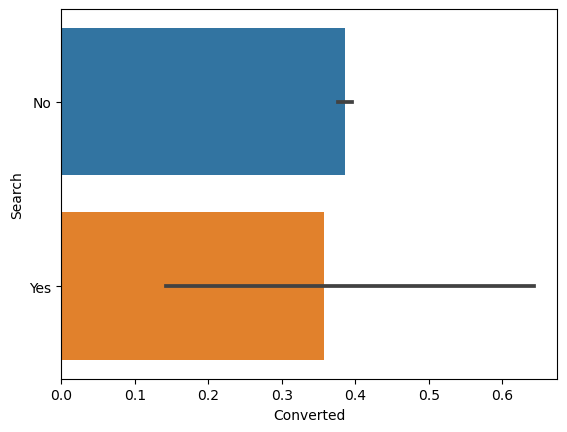

In [3144]:
# Analyzing search 
sns.barplot(data = df1, x= "Converted", y="Search")
plt.show()

# performing a search appears to significantly increase the likelihood of conversion.

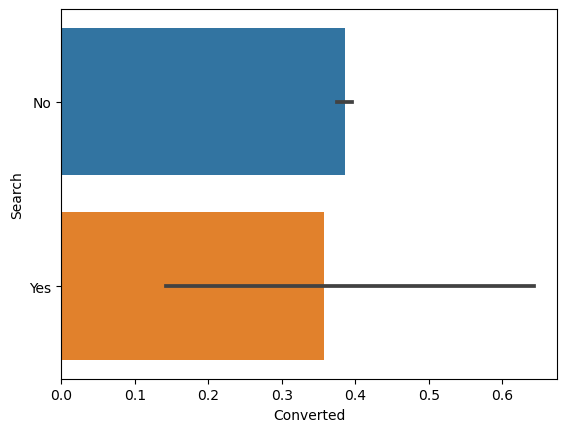

In [3145]:
# Analyzing Digital Advertisement
sns.barplot(data = df1, x= "Converted", y="Search")
plt.show()

# Digital Advertisement significantly increase the likelihood of conversion.

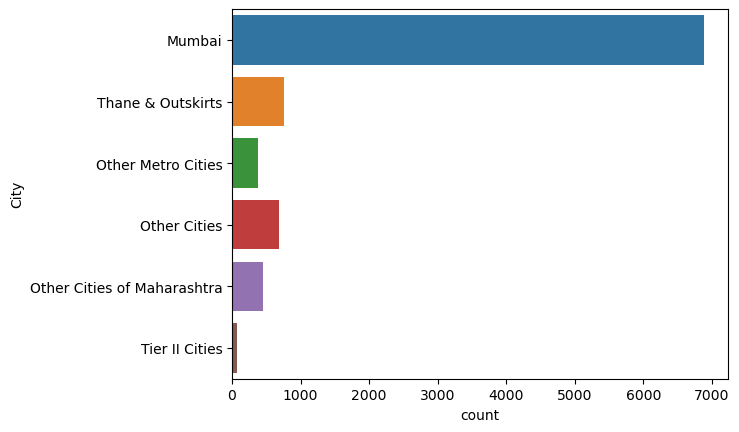

In [3146]:
# Analyzing City
sns.countplot(data=df1, y='City')
plt.show()

# People from Mumbai are more likely to be leads

Bivariate Analysis

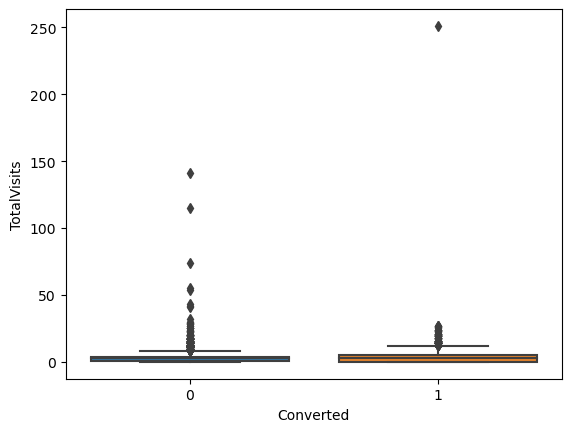

In [3147]:
# Checking number of converted leads in according to the "TotalVisits"

sns.boxplot(data=df1, x="Converted", y="TotalVisits")
plt.show()

# The person who visits twice or thrice on average is likely to be converted as a lead 
# It can also be seen that there are some outliers 

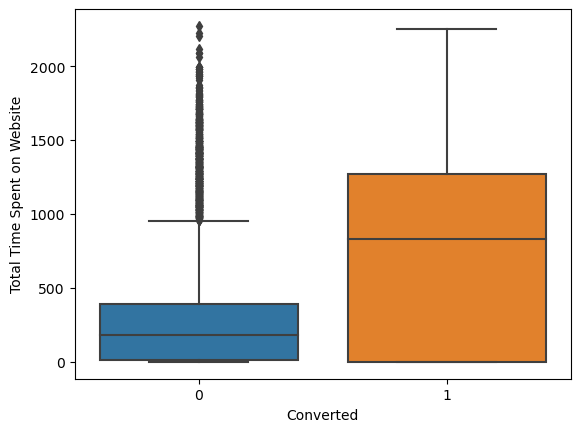

In [3148]:
# Checking number of converted leads in according to the "Total Time Spent on Website"

sns.boxplot(data=df1, x="Converted", y="Total Time Spent on Website")
plt.show()

# The person who spends an average of 800 - 900 minutes is likely to be converted as a lead
# It can also be seen that there are some outliers for those who have not converted

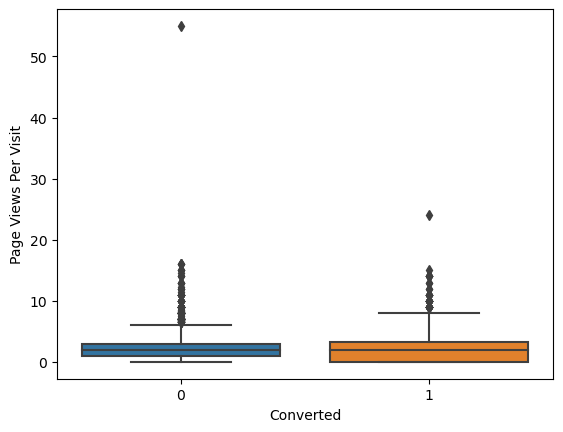

In [3149]:
# Checking number of converted leads in according to the "Page Views Per Visit"

sns.boxplot(data=df1, x="Converted", y="Page Views Per Visit")
plt.show()

# It cannot be identified whether the person will be converted as lead based on Page Views per visit 
# Because the average number of pages visited for those having converted and not converted is almost same
# It can also be seen that there are some outliers

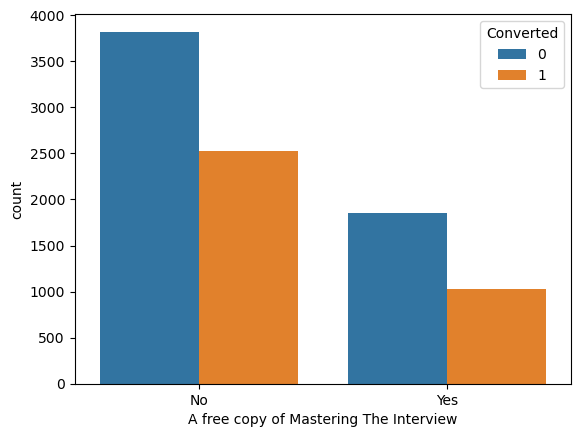

In [3150]:
# Analyzing A free copy of Mastering The Interview against the conversion rate
sns.countplot(data=df1, x ='A free copy of Mastering The Interview', hue = "Converted")
plt.show()

# Offering the free copy might not be a strong incentive for conversion.

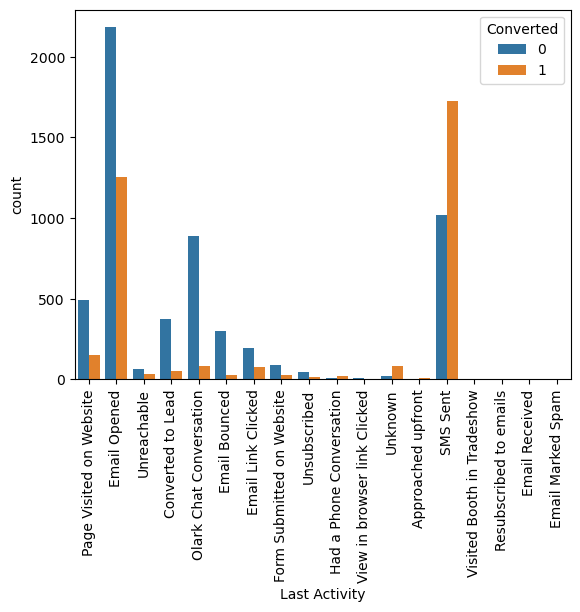

In [3151]:
# Analyzing Last Activity against conversion rate
sns.countplot(data=df1, x ='Last Activity', hue = "Converted")
plt.xticks(rotation = 90)
plt.show()

# The sms sent is the last activity performed by most of the leads 

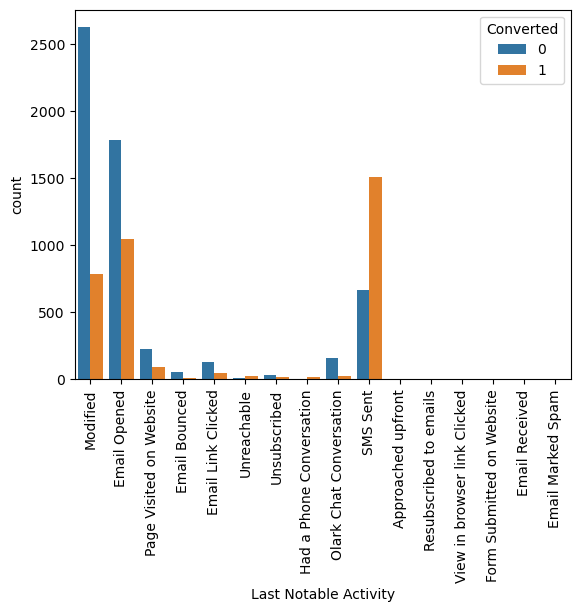

In [3152]:
# Analyzing Last Notable Activity against the conversion rate
sns.countplot(data=df1, x ='Last Notable Activity', hue = "Converted")
plt.xticks(rotation = 90)
plt.show()

# The sms sent is the last notable activity performed by most of the leads 

In [3153]:
df1.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

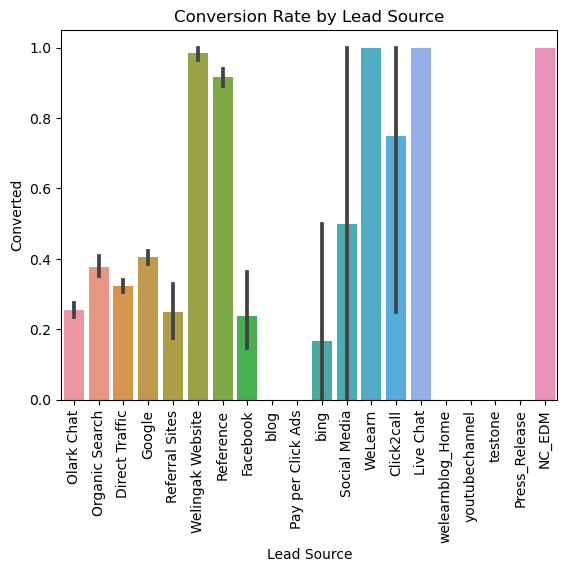

In [3154]:
# Analysing conversion rate with respect to the lead source
sns.barplot(x='Lead Source', y='Converted', data=df1)
plt.title('Conversion Rate by Lead Source')
plt.xticks(rotation = 90)
plt.show()

# Welingak Website and Reference have the highest conversion rates, close to 1.0 (100%).

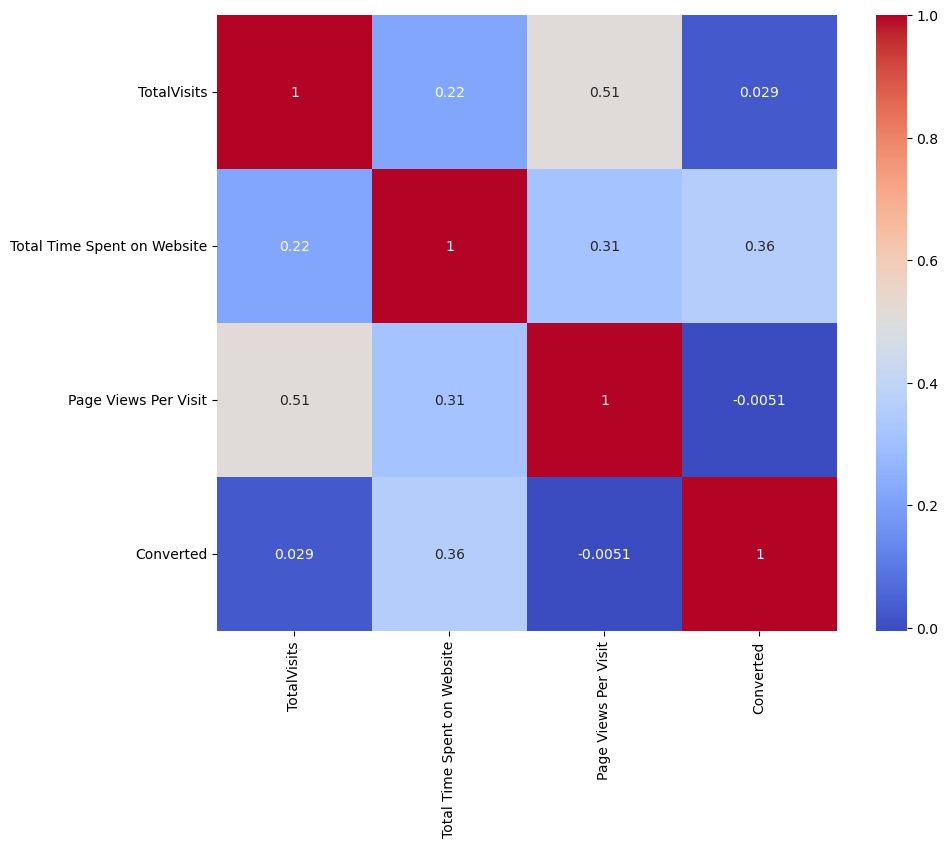

In [3155]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']].corr(), annot=True, cmap='coolwarm')
plt.show()


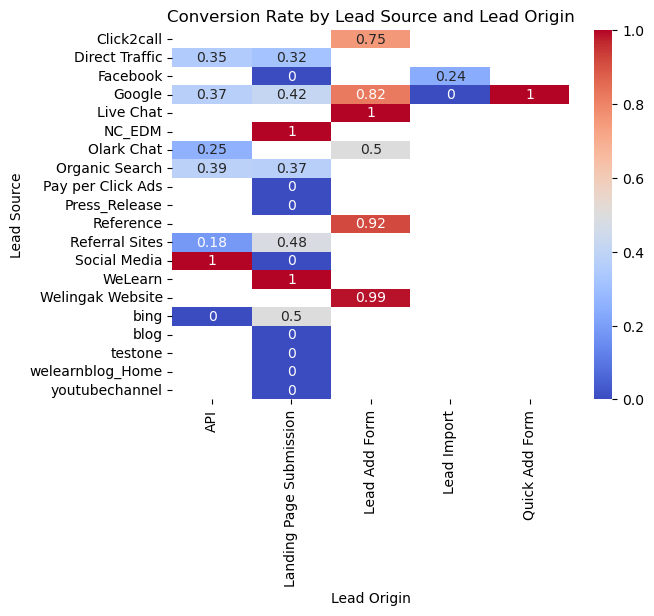

In [3156]:
# Crosstabs and pivot tables for categorical variables
pivot = df1.pivot_table(values='Converted', index='Lead Source', columns='Lead Origin', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Conversion Rate by Lead Source and Lead Origin')
plt.show()

In [3157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

Data Preparation

In [3158]:
# Cap and floor outliers
df_new = df1.copy()
for column in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_new[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df_new[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for column in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:
    df_new[column].fillna(df_new[column].median(), inplace=True)

In [3159]:
df_new.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [3160]:
# Check for outliers 
df_new.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.217424,487.698268,2.255105
std,0.486714,2.860471,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,11.000000,2272.000000,6.000000


In [3161]:
# Checking if the "Receive More Updates About Our Courses" is significant in prediction
df_new["Receive More Updates About Our Courses"].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [3162]:
# All the values turned out to be "no"
# Hence dropping this as this is not significant in prediction

df_new = df_new.drop(columns = ["Receive More Updates About Our Courses"])
df_new.shape

(9240, 26)

In [3163]:
# Checking if the "Update me on Supply Chain Content" is significant in prediction
df_new["Update me on Supply Chain Content"].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [3164]:
# All the values turned out to be "no"
# Hence dropping this as this is not significant in prediction

df_new = df_new.drop(columns = ["Update me on Supply Chain Content"])
df_new.shape

(9240, 25)

In [3165]:
# Checking if the "Get updates on DM Content" is significant in prediction
df_new["Get updates on DM Content"].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [3166]:
# All the values turned out to be "no"
# Hence dropping this as this is not significant in prediction

df_new = df_new.drop(columns = ["Get updates on DM Content"])
df_new.shape

(9240, 24)

In [3167]:
# Checking if the "I agree to pay the amount through cheque" is significant in prediction
df_new["I agree to pay the amount through cheque"].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [3168]:
# All the values turned out to be "no"
# Hence dropping this as this is not significant in prediction

df_new = df_new.drop(columns = ["I agree to pay the amount through cheque"])
df_new.shape

(9240, 23)

In [3169]:
# Since Last activity and Last Notable Activity defines the same thing 
# Dropping one of those 
# Dropping Last Activity Column

df_new = df_new.drop(columns = ["Last Activity"])
df_new.shape

(9240, 22)

In [3170]:
# Dropping "What matters most to you in choosing a course"
# Because it is not as much significant in prediction since almost all leads join for "Better Career Prospects"

df_new = df_new.drop(columns = ["What matters most to you in choosing a course"])
df_new.shape

(9240, 21)

In [3171]:
df_new.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Unknown,Not Specified,...,No,No,No,No,No,No,No,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,India,Not Specified,...,No,No,No,No,No,No,No,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,India,Business Administration,...,No,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,India,Media and Advertising,...,No,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,India,Not Specified,...,No,No,No,No,No,No,No,Mumbai,No,Modified


In [3172]:
df_new.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Country                                   0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Encoding

Converting some binary variables (Yes/No) to 0/1

In [3173]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article',
            'X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_new[varlist] = df_new[varlist].apply(binary_map)

In [3174]:
df_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Unknown,Not Specified,...,0,0,0,0,0,0,0,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674.0,2.5,India,Not Specified,...,0,0,0,0,0,0,0,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,India,Business Administration,...,0,0,0,0,0,0,0,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,India,Media and Advertising,...,0,0,0,0,0,0,0,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,India,Not Specified,...,0,0,0,0,0,0,0,Mumbai,0,Modified


For categorical variables with multiple levels, create dummy features (one-hot encoding)

In [3175]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_new[['Lead Origin','Lead Source','Country','Specialization',
                               'What is your current occupation','City','Last Notable Activity']], 
                               drop_first=True, dtype = int)

# Adding the results to the dataframe
df_new = pd.concat([df_new, dummy], axis=1)

In [3176]:
df_new.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Unknown,Not Specified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674.0,2.5,India,Not Specified,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,India,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,India,Not Specified,...,0,0,1,0,0,0,0,0,0,0


In [3177]:
print(np.array(df_new.columns))

['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Converted'
 'TotalVisits' 'Total Time Spent on Website' 'Page Views Per Visit'
 'Country' 'Specialization' 'What is your current occupation' 'Search'
 'Magazine' 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations' 'City'
 'A free copy of Mastering The Interview' 'Last Notable Activity'
 'Lead Origin_Landing Page Submission' 'Lead Origin_Lead Add Form'
 'Lead Origin_Lead Import' 'Lead Origin_Quick Add Form'
 'Lead Source_Direct Traffic' 'Lead Source_Facebook' 'Lead Source_Google'
 'Lead Source_Live Chat' 'Lead Source_NC_EDM' 'Lead Source_Olark Chat'
 'Lead Source_Organic Search' 'Lead Source_Pay per Click Ads'
 'Lead Source_Press_Release' 'Lead Source_Reference'
 'Lead Source_Referral Sites' 'Lead Source_Social Media'
 'Lead Source_WeLearn' 'Lead Source_Welingak Website' 'Lead Source_bing'
 'Lead Source_blog' 'Lead Source_testone' 'Lead Source_welearnblog_Home'
 'Lead Source_yo

In [3178]:
# Dropping some of the columns with business context 
# Do not call, Do not send email , City

df_new = df_new.drop(columns = ['Do Not Email','Do Not Call', 'City'])
df_new.shape

(9240, 121)

In [3179]:
# Dropping parent variables since we have created dummy variables for them 
df_new = df_new.drop(columns = ['Lead Origin','Lead Source','Country','Specialization',
                               'What is your current occupation','Last Notable Activity'], axis = 1)

In [3180]:
# Checking the shape of the Dataframe 
df_new.shape

(9240, 115)

In [3181]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 115 entries, Converted to Last Notable Activity_View in browser link Clicked
dtypes: float64(3), int32(103), int64(9)
memory usage: 4.5 MB


Checking for Outliers in the continuous variables

In [3182]:
# Checking for outliers in the continuous variables
num_df_new = df_new[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [3183]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df_new.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.217424,487.698268,2.255105
std,2.860471,548.021466,1.779471
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,11.000000,1840.610000,6.000000


Train Test Split 

In [3184]:
# Importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [3185]:
# X (Predictor variable)
X = df_new.drop(columns = ["Converted"])
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428.0,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3186]:
# y (Response variable)
y = df_new["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [3187]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling

In [3188]:
# Scaling continuous variables
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [3189]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.275215,0.005716,-0.516439,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.624595,-0.691418,0.143543,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.624595,1.365219,1.553761,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [3190]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,1.672735,0.964504,2.117849,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0.624595,-0.777416,1.553761,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9199,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3191]:
#Checking the conversion rate 
(sum(df_new['Converted'])/len(df_new['Converted'].index))*100

38.53896103896104

We have almost 38% conversion rate

Feature Selection using RFE

In [3192]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [3193]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [3194]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False])

In [3195]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Search', False, 57),
 ('Magazine', False, 95),
 ('Newspaper Article', False, 9),
 ('X Education Forums', False, 37),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 11),
 ('Through Recommendations', False, 41),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Origin_Quick Add Form', False, 91),
 ('Lead Source_Direct Traffic', False, 45),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 59),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 58),
 ('Lead Source_Organic Search', False, 56),
 ('Lead Source_Pay per Click Ads', False, 64),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', False, 20),
 ('Lead Source_Referral Si

In [3196]:
col = X_train.columns[rfe.support_]

In [3197]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Country_Australia', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Belgium', 'Country_Canada',
       'Country_China', 'Country_Denmark', 'Country_France', 'C

Assessing the model with StatsModels

In [3198]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.3
Date:                Sun, 19 May 2024   Deviance:                       5462.6
Time:                        20:12:47   Pearson chi2:                 7.60e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4069      0.116     -3.515      0.000      -0.634      -0.180
Total Time Spent on Website                              1.1010      0.039     27.947      0.000       1.024       1.178
Lead Origin_Landing Page Submission                     -1.2467      0.122    -10.248      0.000      -1.485      -1.008
Lead Origin_Lead Add Form                                2.2490      0.200     11.237      0.000       1.857       2.641
Lead Source_Welingak Website                             2.6125      0.745      3.509      0.000       1.153       4.072
Country_Qatar                                          -23.0844   2.38e+04     -0.001      0.999   -4.67e+04    4.66e+04
Country_Saudi Arabia                                    -1.0558      0.758     -1.392      0.164      -2.542       0.430
Country_Unknown                                          0.9226      0.116      7.923      0.000       0.694       1.151
Specialization_Hospitality Management                   -1.1429      0.324     -3.524      0.000      -1.779      -0.507
Specialization_Not Specified                            -1.3685      0.122    -11.192      0.000      -1.608      -1.129
What is your current occupation_Housewife               24.1370   2.19e+04      0.001      0.999   -4.29e+04    4.29e+04
What is your current occupation_Working Professional     2.6372      0.192     13.700      0.000       2.260       3.015
Last Notable Activity_Had a Phone Conversation           3.6423      1.108      3.288      0.001       1.471       5.813
Last Notable Activity_Olark Chat Conversation           -0.7696      0.328     -2.348      0.019      -1.412      -0.127
Last Notable Activity_SMS Sent                           1.7154      0.078     22.035      0.000       1.563       1.868
Last Notable Activity_Unreachable                        1.8290      0.514      3.557      0.000       0.821       2.837
========================================================================================================================
"""

In [3199]:
# dropping "What is your current occupation_Housewife","Country_Qatar", "Country_Saudi Arabia", "Country_Unknown"

X_train_sm = X_train_sm.drop(columns = ["What is your current occupation_Housewife","Country_Qatar",
                                         "Country_Saudi Arabia", "Country_Unknown"])
X_train_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1871,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0
6795,1.0,0.005716,1,0,0,0,1,0,0,0,0,0
3516,1.0,-0.691418,0,0,0,0,1,0,0,0,0,0
8105,1.0,1.365219,1,0,0,0,0,0,0,0,1,0
3934,1.0,-0.885371,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
350,1.0,-0.885371,0,1,0,0,0,0,0,0,0,0
79,1.0,0.404601,0,1,0,1,0,1,0,0,0,0
8039,1.0,-0.885371,0,0,0,0,1,0,0,0,0,0
6936,1.0,-0.449891,1,0,0,0,0,0,0,0,0,0


In [3200]:
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2775.5
Date:                Sun, 19 May 2024   Deviance:                       5551.0
Time:                        20:12:48   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1402      0.110     -1.280      0.201      -0.355       0.075
Total Time Spent on Website                              0.9849      0.036     27.672      0.000       0.915       1.055
Lead Origin_Landing Page Submission                     -1.4518      0.118    -12.352      0.000      -1.682      -1.221
Lead Origin_Lead Add Form                                2.7428      0.191     14.346      0.000       2.368       3.117
Lead Source_Welingak Website                             2.5332      0.744      3.405      0.001       1.075       3.991
Specialization_Hospitality Management                   -1.0769      0.319     -3.377      0.001      -1.702      -0.452
Specialization_Not Specified                            -1.2161      0.119    -10.221      0.000      -1.449      -0.983
What is your current occupation_Working Professional     2.6358      0.189     13.947      0.000       2.265       3.006
Last Notable Activity_Had a Phone Conversation           3.5064      1.107      3.168      0.002       1.337       5.676
Last Notable Activity_Olark Chat Conversation           -0.5902      0.329     -1.792      0.073      -1.236       0.055
Last Notable Activity_SMS Sent                           1.6911      0.077     21.966      0.000       1.540       1.842
Last Notable Activity_Unreachable                        1.7329      0.508      3.412      0.001       0.737       2.728
========================================================================================================================
"""

In [3201]:

# Get feature importance
feature = pd.DataFrame({
    'feature': list(X_train_sm.columns),
    'coefficient': res.params
})
feature['absolute_coefficient'] = feature['coefficient'].abs()
top_features = feature.sort_values(by='absolute_coefficient', ascending=False).head(3)

print("Top 3 contributing variables:")
top_features[['coefficient']]

Top 3 contributing variables:


,coefficient
Last Notable Activity_Had a Phone Conversation,3.506386
Lead Origin_Lead Add Form,2.742767
What is your current occupation_Working Professional,2.635815


#### The variables with the largest absolute values of coefficients are the most influential.
#### Hence Current occupation, Lead Source and Last Notable Activity are the top three variables which contribute most towards the probability of a lead getting converted

#### Hence Last Notable Activity_Had a Phone Conversation, Lead Origin_Lead Add Form and What is your current occupation_Working Professional are the top three variables which should be focused the most on to increase the probability of lead conversion

In [3202]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

1871    0.266538
6795    0.057188
3516    0.115338
8105    0.809036
3934    0.097231
4844    0.989746
3297    0.090225
8071    0.993179
987     0.318738
7423    0.907172
1032    0.846665
6542    0.381166
4317    0.096792
6472    0.342752
712     0.123874
3960    0.097231
4654    0.097231
5902    0.108221
4691    0.097231
4341    0.148680
dtype: float64

Creating a dataframe with the actual Converted flag and the predicted probabilities i.e, lead score

In [3203]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final.head()

,Converted,Lead_Score
1871,0,0.266538
6795,0,0.057188
3516,0,0.115338
8105,0,0.809036
3934,0,0.097231


Creating new column 'predicted' with 1 if Lead_Score > 0.5 else 0

In [3204]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score,predicted
1871,0,0.266538,0
6795,0,0.057188,0
3516,0,0.115338,0
8105,0,0.809036,1
3934,0,0.097231,0


In [3205]:
from sklearn import metrics
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8002473716759431


Checking VIF

In [3206]:
# Importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3207]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# There are no variables with high variables , so no need of dropping them

,Features,VIF
6,Country_Unknown,2.76
8,Specialization_Not Specified,1.93
2,Lead Origin_Lead Add Form,1.84
13,Last Notable Activity_SMS Sent,1.36
1,Lead Origin_Landing Page Submission,1.27
0,Total Time Spent on Website,1.26
3,Lead Source_Welingak Website,1.26
10,What is your current occupation_Working Profes...,1.19
12,Last Notable Activity_Olark Chat Conversation,1.05
7,Specialization_Hospitality Management,1.02


Confusion Matrix

In [3208]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3583,  419],
       [ 873, 1593]], dtype=int64)

####      Actual/Predicted     
                        not_churn    churn
        # not_churn        3583      419
        # churn            873       1593  

In [3209]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted ))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4002
           1       0.79      0.65      0.71      2466

    accuracy                           0.80      6468
   macro avg       0.80      0.77      0.78      6468
weighted avg       0.80      0.80      0.80      6468



Plotting ROC Curve

In [3210]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    print("\n The ROC_AUC Score : ")
    print(auc_score)

    return None

In [3211]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

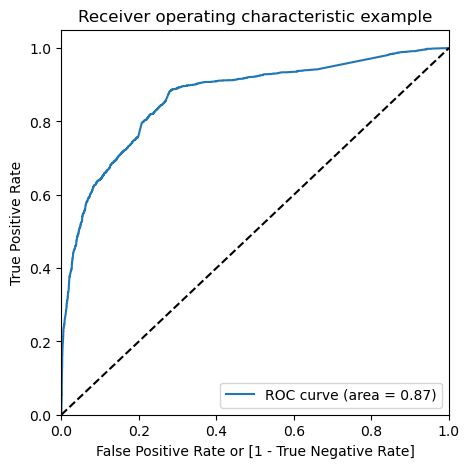


 The ROC_AUC Score : 
0.8658237284439694


In [3212]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

Finding optimal cutoff point

In [3213]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.266538,0,1,1,1,0,0,0,0,0,0,0
6795,0,0.057188,0,1,0,0,0,0,0,0,0,0,0
3516,0,0.115338,0,1,1,0,0,0,0,0,0,0,0
8105,0,0.809036,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.097231,0,1,0,0,0,0,0,0,0,0,0


In [3214]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [3215]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Lead_Score','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Lead_Score  accuracy     sensi     speci
0.0         0.0  0.381262  1.000000  0.000000
0.1         0.1  0.583643  0.939984  0.364068
0.2         0.2  0.771800  0.891727  0.697901
0.3         0.3  0.781849  0.843471  0.743878
0.4         0.4  0.790971  0.730333  0.828336
0.5         0.5  0.800247  0.645985  0.895302
0.6         0.6  0.800557  0.589619  0.930535
0.7         0.7  0.783395  0.506083  0.954273
0.8         0.8  0.763142  0.424980  0.971514
0.9         0.9  0.717532  0.277778  0.988506


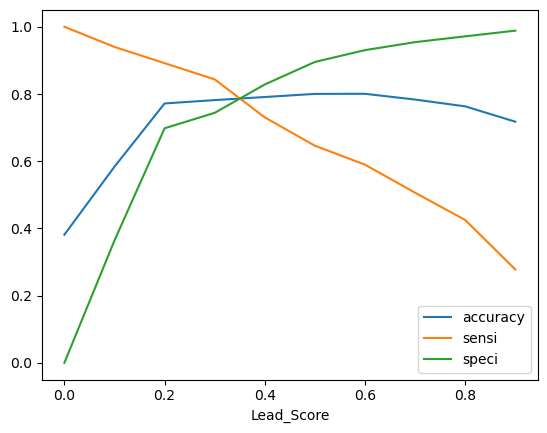

In [3216]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Lead_Score', y=['accuracy','sensi','speci'])
plt.show()

0.35 seems to be the accurate optimal point

In [3217]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.266538,0,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.057188,0,1,0,0,0,0,0,0,0,0,0,0
3516,0,0.115338,0,1,1,0,0,0,0,0,0,0,0,0
8105,0,0.809036,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.097231,0,1,0,0,0,0,0,0,0,0,0,0


In [3218]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7898886827458256

In [3219]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3114,  888],
       [ 471, 1995]], dtype=int64)

In [3220]:
# Classification Report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted ))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      4002
           1       0.79      0.65      0.71      2466

    accuracy                           0.80      6468
   macro avg       0.80      0.77      0.78      6468
weighted avg       0.80      0.80      0.80      6468



Making Predictions on Test set

In [3221]:
X_test = X_test[col].drop(columns = ["What is your current occupation_Housewife","Country_Qatar",
                                         "Country_Saudi Arabia", "Country_Unknown"])
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,1,0,0,0,1,0
2376,-0.885371,0,1,0,0,1,0,0,0,1,0
7766,-0.777416,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,0,0,0,1,0,0,0,0,0
4359,-0.885371,0,1,0,0,0,0,0,0,0,0


In [3222]:
X_test_sm = sm.add_constant(X_test)

In [3223]:
y_test_pred = res.predict(X_test_sm)

In [3224]:
y_test_pred[:10]

4269    0.783261
2376    0.900743
7766    0.969609
9199    0.097231
4359    0.849477
9186    0.581758
1631    0.345599
8963    0.148630
8007    0.136565
5324    0.381166
dtype: float64

In [3225]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.783261
2376,0.900743
7766,0.969609
9199,0.097231
4359,0.849477


In [3226]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [3227]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [3228]:
y_pred_final.head()

,Converted,0
4269,1,0.783261
2376,1,0.900743
7766,1,0.969609
9199,0,0.097231
4359,1,0.849477


In [3229]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score'})
y_pred_final.head()

,Converted,Lead_Score
4269,1,0.783261
2376,1,0.900743
7766,1,0.969609
9199,0,0.097231
4359,1,0.849477


In [3230]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Lead_Score,final_predicted
4269,1,0.783261,1
2376,1,0.900743,1
7766,1,0.969609,1
9199,0,0.097231,0
4359,1,0.849477,1


In [3231]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.786075036075036

In [3232]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1307,  370],
       [ 223,  872]], dtype=int64)

In [3233]:
# Classification Report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1677
           1       0.70      0.80      0.75      1095

    accuracy                           0.79      2772
   macro avg       0.78      0.79      0.78      2772
weighted avg       0.79      0.79      0.79      2772



In [3234]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [3235]:
# Calculating sensitivity 
TP / float(TP+FN)

0.7963470319634703

In [3236]:
# Calculating specificity
TN / float(TN+FP)

0.7793679189028027